# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`.

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_excel(r"C:\Users\Danyal Reyaz\Documents\Perform exploratory data analysis on retail data with Python\Online Retail.xlsx")

# Display the first few rows of the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 2: Explore the Data

In [4]:
# Get summary statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


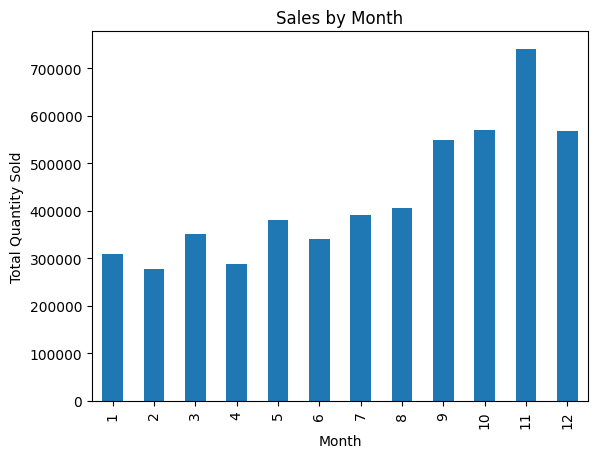

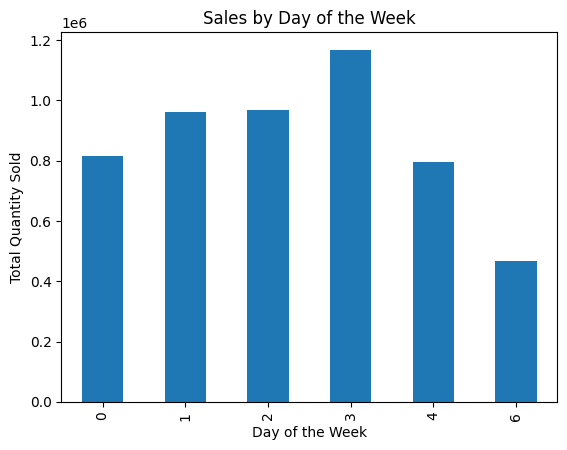

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and day of week
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Plot sales by month
monthly_sales = df.groupby('Month')['Quantity'].sum()
monthly_sales.plot(kind='bar', title='Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

# Plot sales by day of the week
daily_sales = df.groupby('DayOfWeek')['Quantity'].sum()
daily_sales.plot(kind='bar', title='Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.show()

## Task 3: Clean and Validate the Data

In [6]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [7]:
# Drop duplicates
df = df.drop_duplicates()

In [8]:
# Remove rows with negative quantities
df = df[df['Quantity'] > 0]

## Task 4: Analyze the Data

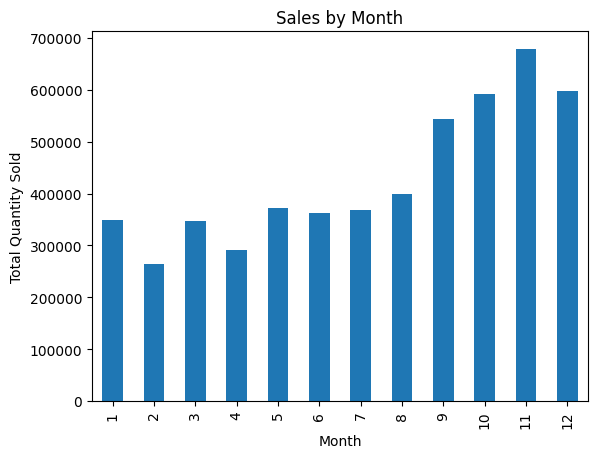

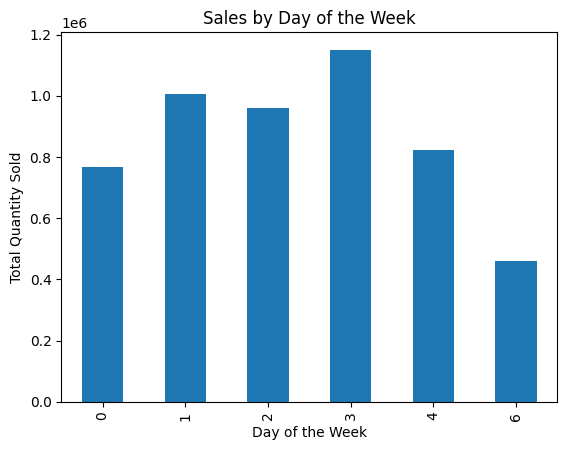

In [9]:
# Monthly sales
monthly_sales = df.groupby('Month')['Quantity'].sum()
monthly_sales.plot(kind='bar', title='Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

# Daily sales
daily_sales = df.groupby('DayOfWeek')['Quantity'].sum()
daily_sales.plot(kind='bar', title='Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.show()

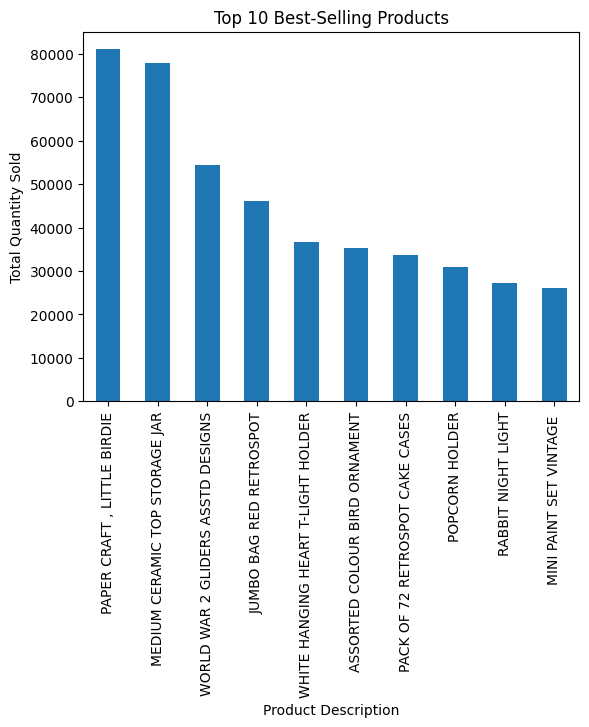

In [10]:
# Top 10 products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Best-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.show()

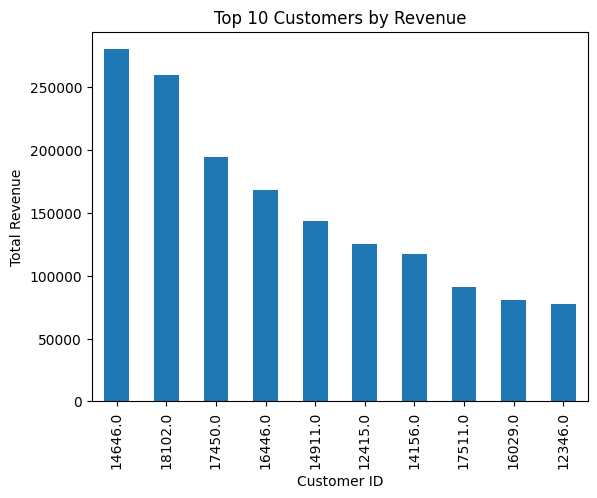

In [11]:
# Revenue calculation
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Top 10 customers by revenue
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.show()

## Task 5: Findings and Conclusions

This analysis provides a comprehensive overview of sales trends, product performance, and customer behavior. By leveraging these insights, the online retail store can optimize operations, enhance customer satisfaction, and improve overall business performance.